# Exploratory analysis

This is a brief document which goes through the step by step procedures in most machine learning analysis - inference or prediction. Not all code written here will be useful on every project but a lot will be on most projects. This specific document starts from the beginning and goes to th point in which the data is cleaned and the model has been selected.  

### Data and package import

In [170]:
#Packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#Data - using a datset on heart attacks
data = pd.read_csv('heart.csv')

### Exploratory Analysis

In [171]:
#shows top five rows
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [172]:
#shows bottom five rows
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [173]:
#checking the types of data
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [174]:
#dropping irrelevant columns - we drop target here as its the variable we trying to predict
X = data.drop(columns = 'target')
y = data['target']

In [175]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [176]:
y #can use '?' after any object to check details of it. 

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [177]:
X.columns = ['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'induced_angina', 'oldpeak', 'slope', 'ca', 'thal']
data.columns = ['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'induced_angina', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [178]:
X.head()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,induced_angina,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [179]:
#dropping null values
X.size

3939

In [180]:
X = X.dropna()
X.size

3939

In [181]:
#outlier exploration
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = data.select_dtypes(include=numerics)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000123D39305C8>,
      dtype=object)

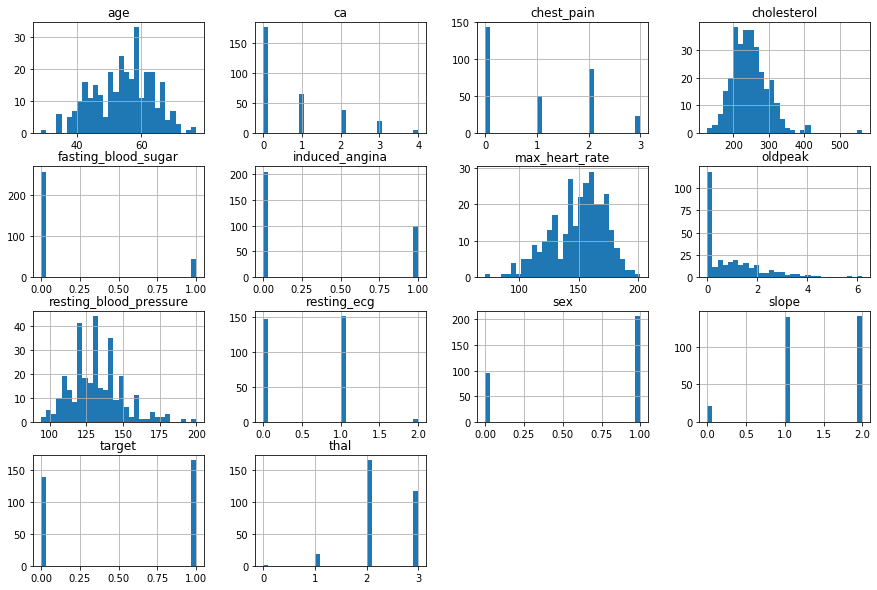

In [182]:
#histogram of all variables
data.hist(bins=30, figsize=(15, 10))

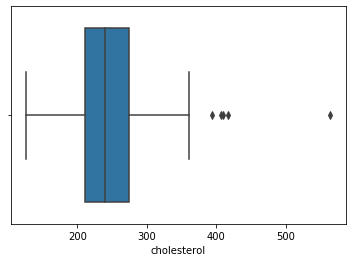

In [183]:
#from the above histograms it seemed likely that chol suffered from a few outliers
sns.boxplot(x=data['cholesterol'])


In [184]:
#These outliers can therefore be removed
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data.shape

(303, 14)

In [185]:
data_no_outliers = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_no_outliers.shape

(228, 14)

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,induced_angina,oldpeak,slope,ca,thal,target
age,1.000000,-0.088839,-0.078448,0.266698,0.172527,NaN,-0.082927,-0.413016,0.123981,0.219390,-0.161019,0.391099,0.124380,-0.215120
sex,-0.088839,1.000000,-0.121648,-0.001433,-0.093058,NaN,-0.116956,-0.086734,0.208950,0.178690,-0.009104,0.099091,0.274262,-0.363483
chest_pain,-0.078448,-0.121648,1.000000,0.083476,-0.047258,NaN,0.076362,0.277964,-0.351256,-0.108435,0.101887,-0.196373,-0.153325,0.371115
resting_blood_pressure,0.266698,-0.001433,0.083476,1.000000,0.126974,NaN,-0.110594,-0.026792,-0.019909,0.131845,-0.026418,0.027864,0.057721,-0.092560
cholesterol,0.172527,-0.093058,-0.047258,0.126974,1.000000,NaN,-0.100622,-0.016899,0.019446,-0.030397,0.066865,0.108537,0.077890,-0.067321
fasting_blood_sugar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resting_ecg,-0.082927,-0.116956,0.076362,-0.110594,-0.100622,NaN,1.000000,0.033100,-0.063645,-0.081251,0.094807,-0.082538,0.008018,0.131641
max_heart_rate,-0.413016,-0.086734,0.277964,-0.026792,-0.016899,NaN,0.033100,1.000000,-0.449447,-0.372484,0.418646,-0.272552,-0.216389,0.417870
induced_angina,0.123981,0.208950,-0.351256,-0.019909,0.019446,NaN,-0.063645,-0.449447,1.000000,0.358779,-0.281890,0.197251,0.274480,-0.414407
oldpeak,0.219390,0.178690,-0.108435,0.131845,-0.030397,NaN,-0.081251,-0.372484,0.358779,1.000000,-0.515543,0.332854,0.220089,-0.439194


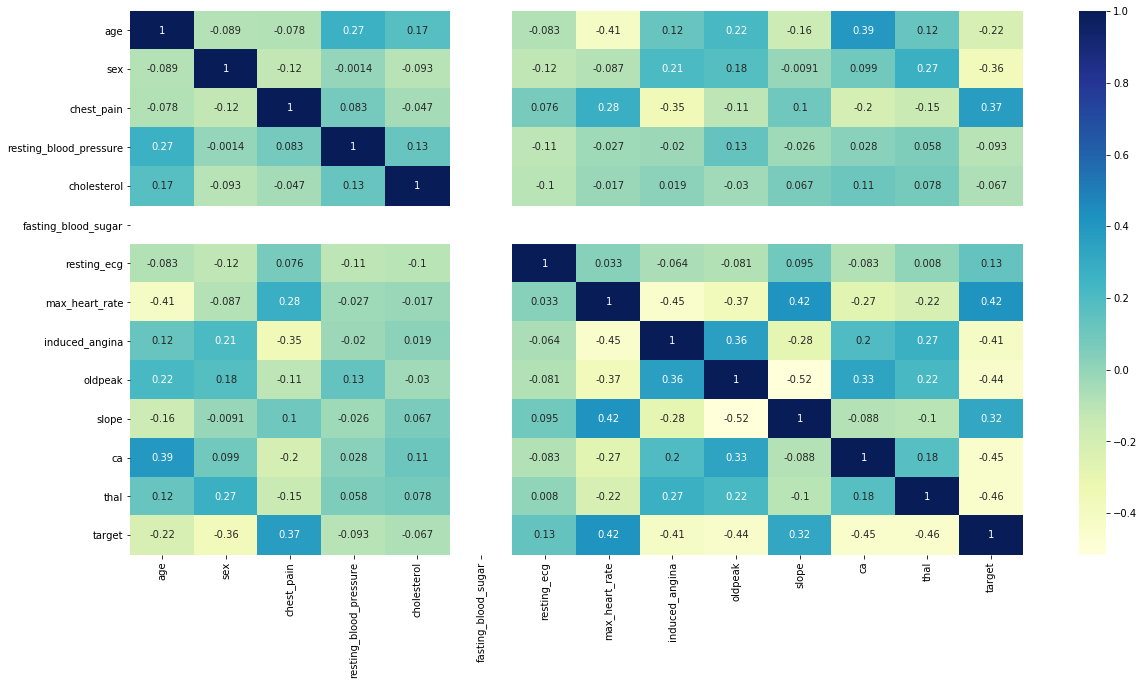

In [188]:
plt.figure(figsize=(20,10))
c= data_no_outliers.corr()
sns.heatmap(c,cmap='YlGnBu',annot=True)
c

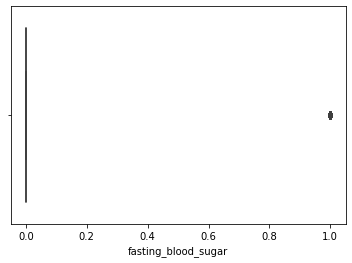

In [187]:
#no variation is fasting bood sugar - maybe hasty in removing the outliers. 
sns.boxplot(x=data['fasting_blood_sugar'])


,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,induced_angina,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
resting_blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
resting_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
max_heart_rate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
induced_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


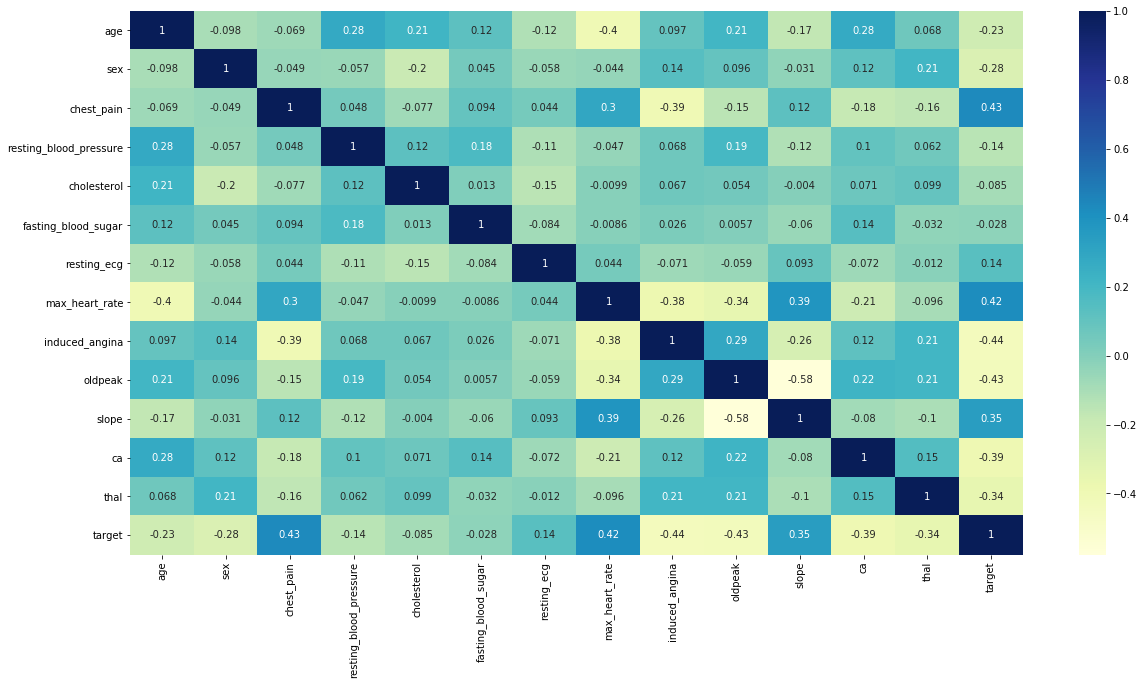

In [190]:
#repeating again with outliers restored
plt.figure(figsize=(20,10))
c= data.corr()
sns.heatmap(c,cmap='YlGnBu',annot=True)
c

In [191]:
#It can be seen that there is actually very little correlation between fasting blood sugar anyway - so its fine to be removed.
data_no_outliers = data_no_outliers.drop(columns = ['fasting_blood_sugar'])